## Basic Classification of Images using Neural Network

In [1]:
# importing packages to classify images of clothing
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.models import Sequential
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Importing Fashion MNIST Data Set for our Experiment

Tha Data Set can be accessed directly from TensorFlow we just have to import and load the data set from TensorFlow directly

In [2]:
fashion = tf.keras.datasets.fashion_mnist
# loading the dataset for tarining and testing of model into images and their labels
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [3]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print("Shape for train data set {} and shape for test data set is {}".format(train_images.shape,test_images.shape))

Shape for train data set (60000, 28, 28) and shape for test data set is (10000, 28, 28)


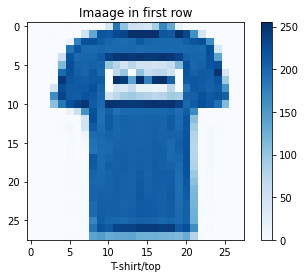

In [5]:
plt.figure()
# imshow is used to display the data as an image
# Each row represent a different Images
plt.imshow(train_images[1], cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(False)
plt.title("Imaage in first row")
plt.xlabel(labels[train_labels[1]])
plt.show()

## Scaling the values

Scaling the values between 0 to 1 before applying neural network as the values could be very large at some pixel values in that case the model will give ambigous result. It's always a better practice to scale the data set before applying ang ML or Neural Network model. To scale this we will devide the taining and test by 255.

In [6]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

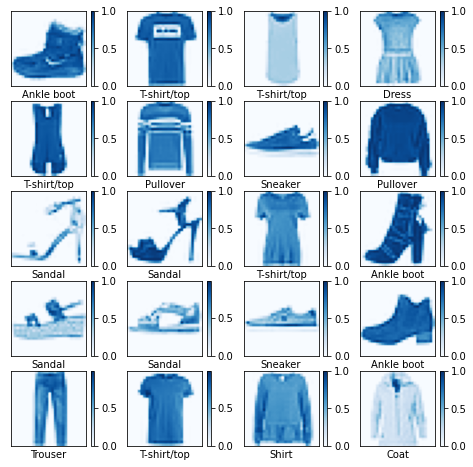

In [7]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel(labels[train_labels[i]])
plt.show()

## Building Neural Network Model

Building the neural network requires configuring the layer of model and then compiling the model.

## The first layer will just format the image it has no parameter to learn anything

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(BatchNormalization)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the model with train data set and then we will check for the predictions of our model from the test data set

verbose is used to check the progress of each epoch while training the model (0 means it will not show anythin, in 1 and 2 it will show the progress of each epoch.

In [10]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.4934 - acc: 0.8236
Epoch 2/15
60000/60000 [==============================] - 21s 343us/sample - loss: 0.3701 - acc: 0.8633
Epoch 3/15
60000/60000 [==============================] - 21s 356us/sample - loss: 0.3363 - acc: 0.8760
Epoch 4/15
60000/60000 [==============================] - 26s 438us/sample - loss: 0.3144 - acc: 0.8841 - loss: 0.3152 - ac - ETA: 3s - loss: 0 - ETA - ETA:  - ETA: 0s - loss: 0.3145 - ac - ETA: 0s - loss: 
Epoch 5/15
60000/60000 [==============================] - 48s 795us/sample - loss: 0.2958 - acc: 0.8892
Epoch 6/15
60000/60000 [==============================] - 47s 778us/sample - loss: 0.2810 - acc: 0.8949
Epoch 7/15
60000/60000 [==============================] - 44s 738us/sample - loss: 0.2696 - acc: 0.8985 - loss
Epoch 8/15
60000/60000 [==============================] - 48s 794us/sample - loss: 0.2575 - acc: 0.9021 - loss: 0.2576 - acc: 0 -
Epoch 9/15
60000/60000 [=========

In [11]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
print('\nTrain accuracy is:{} and Train loss is: {}'.format(train_acc,train_loss))

60000/60000 - 16s - loss: 0.1971 - acc: 0.9240

Train accuracy is:0.9240166544914246 and Train loss is: 0.1970923244488736


In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy is:{} and Test loss is: {}'.format(test_acc,test_loss))

10000/10000 - 20s - loss: 0.3696 - acc: 0.8845

Test accuracy is:0.8845000267028809 and Test loss is: 0.3695854373574257


## Few steps which are used to improve the accuracy the model

1) number of layers are increased while designing the layers for our model

2) number of epochs are changed to find the best epoch value

## Change in accuracy of training set and test set

reason for difference in accuracy of training and test data set is overfitting since the data set is small we can add some random noise to the data set to avoid overfitting.

In [13]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

In [39]:

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.Blues)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                    100*np.max(predictions_array),
                                    labels[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('brown')

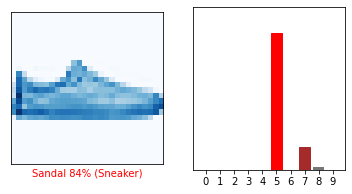

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

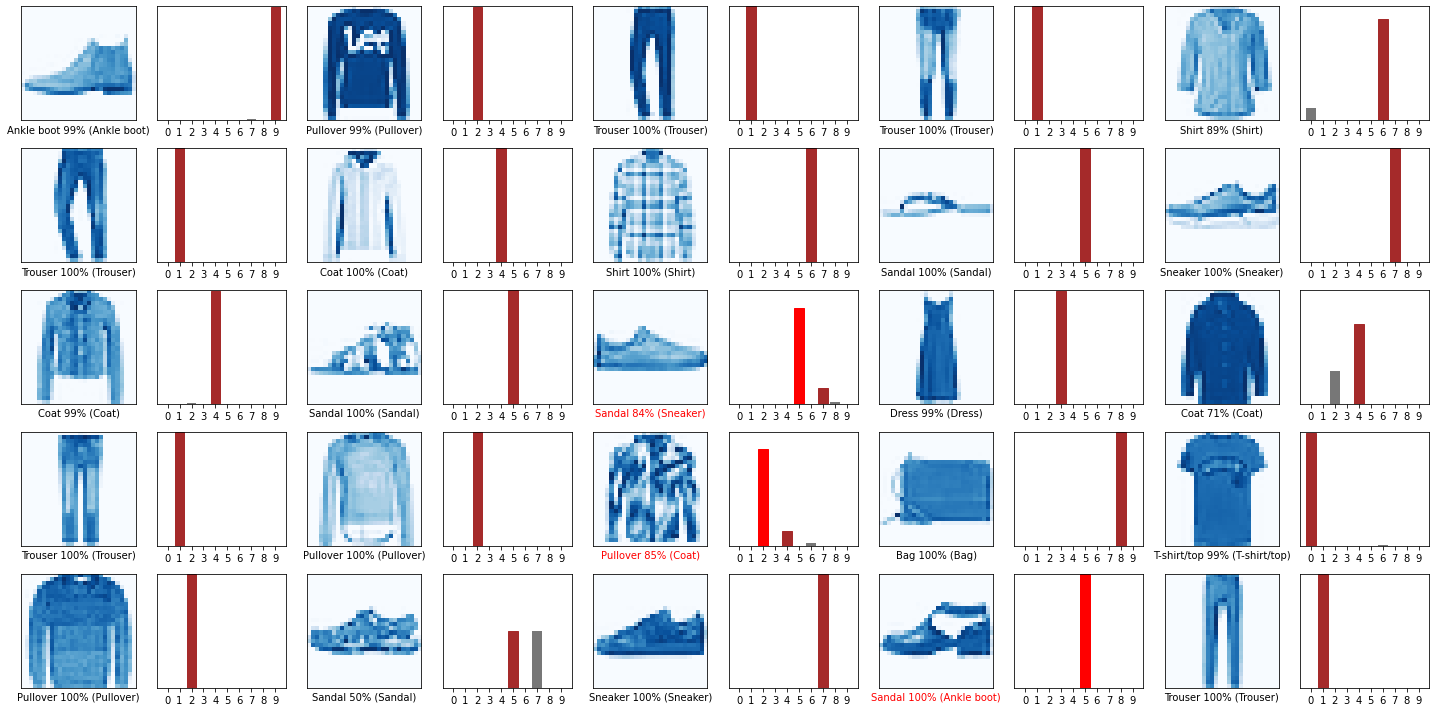

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()